In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/water_potability.csv')

In [95]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

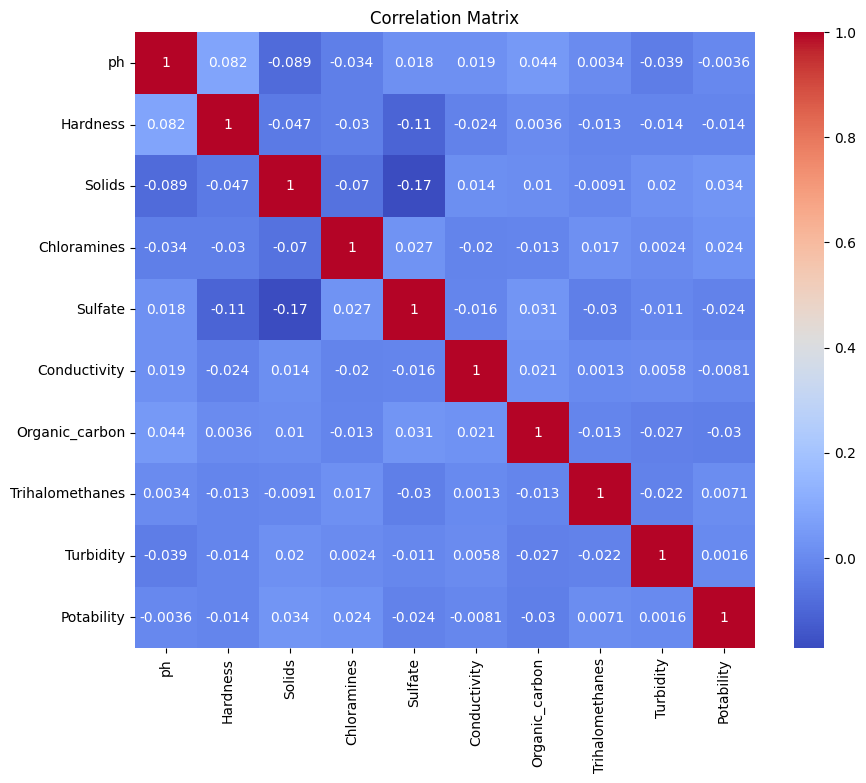

In [83]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [84]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

<Axes: xlabel='Potability', ylabel='count'>

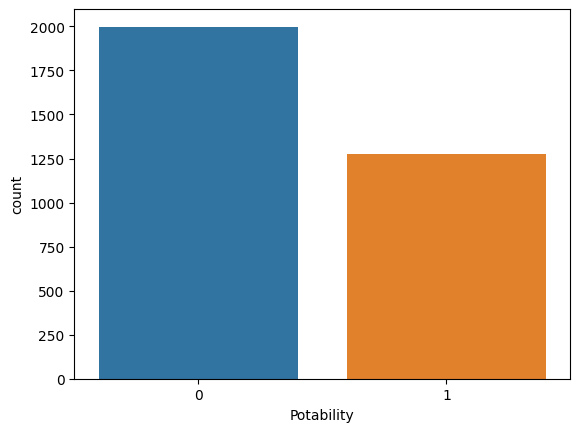

In [6]:
sns.countplot(data = df, x = 'Potability')

There is an imbalance of data for the target variable

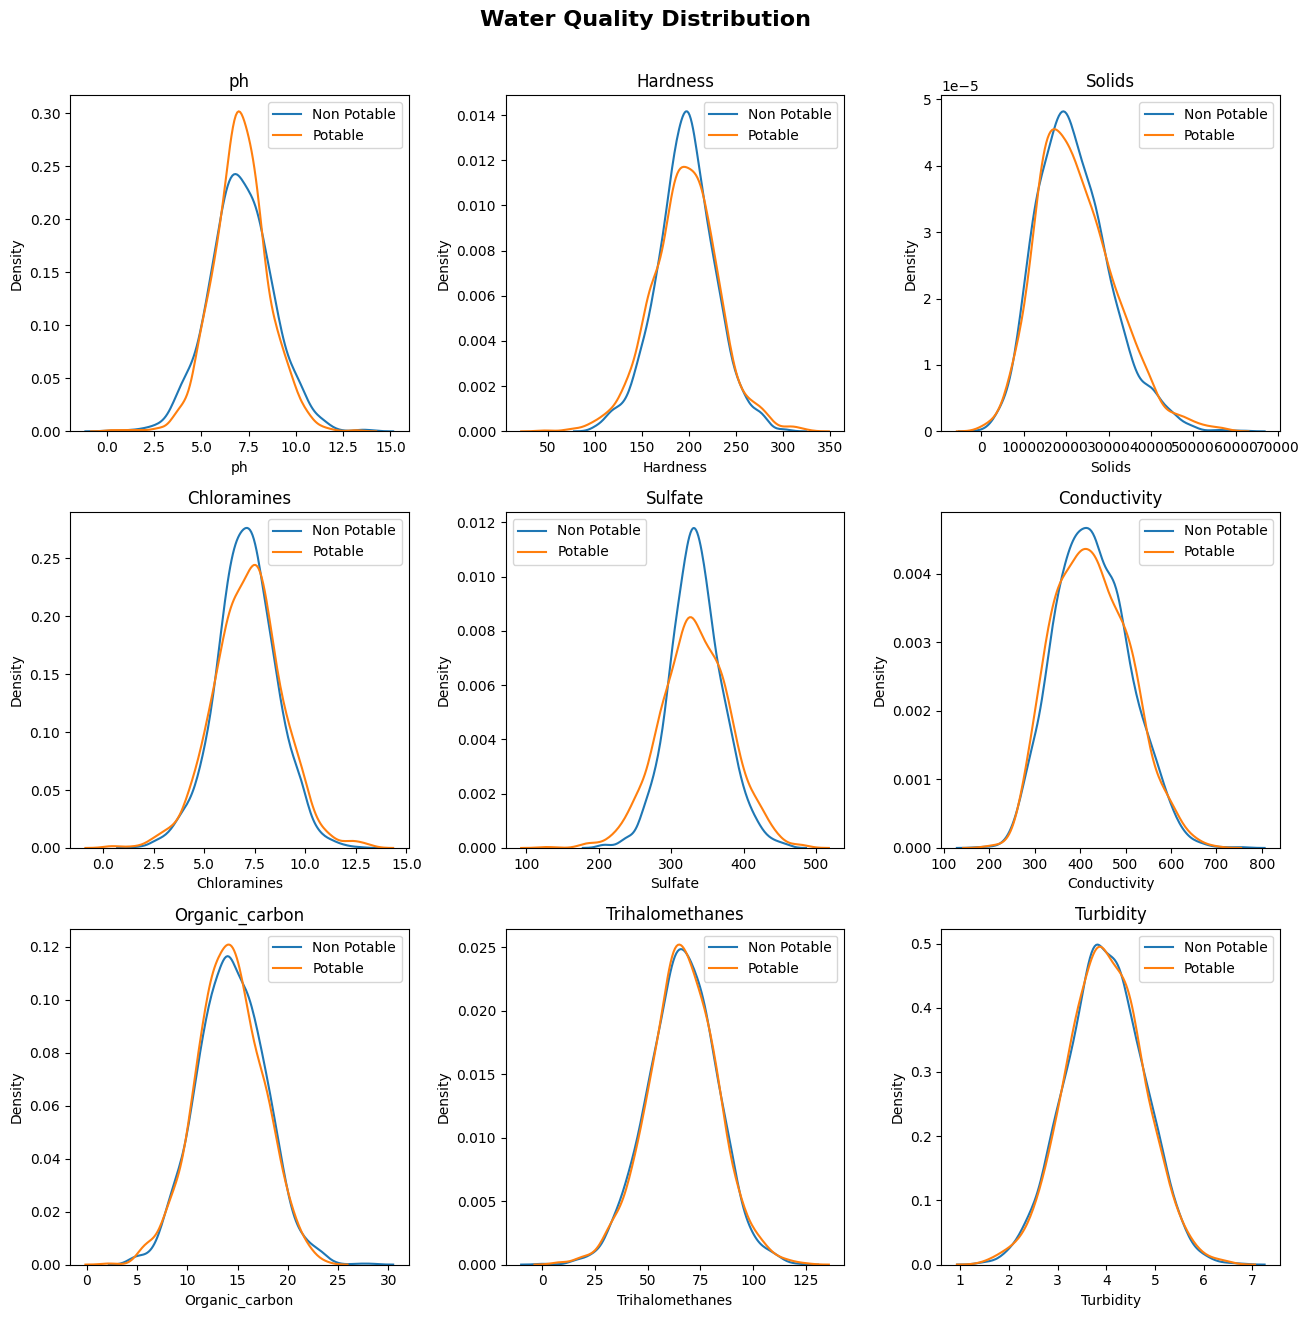

In [7]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] == 1]

plt.figure(figsize=(13,13))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col],label = "Non Potable")
    sns.kdeplot(x=potable[col],label = "Potable")
    plt.legend()

plt.suptitle('Water Quality Distribution',y=1.01, size = 16, color = 'black', weight='bold')
plt.tight_layout()

According to the plot of the Target variable for each features in the dataset , the distribution is gaussian i.e normal distribution so dealing with missing values could be done by imputing mean values for that features where the values are missing.


The histogram for pH likely shows a roughly normal distribution, indicating that most water samples have a pH value near the mean of the dataset. The pH level in water is crucial for its potability, and values typically range from 6.5 to 8.5 for safe drinking water. Hardness:
Hardness, mainly due to calcium and magnesium salts, is expected to display a distribution that could be normal or skewed. The histogram would reveal how varied the hardness levels are across different water samples. Solids (Total Dissolved Solids - TDS):
The distribution of TDS might be right-skewed, indicating a concentration of lower values with fewer samples having high TDS. TDS levels are critical as they determine the salinity and overall 'hardness' of the water. Chloramines:
Chloramines, used as disinfectants, might exhibit a normal distribution in the histogram. Safe levels are usually up to 4 mg/L, and the histogram would indicate how many samples fall within this safe range. Sulfate:
Sulfates can vary significantly in water. A histogram here can show whether the sulfate concentration in most samples is within a safe limit, with the possibility of a skewed distribution if some samples have exceptionally high or low sulfate levels. Conductivity:
Electrical conductivity (EC) reflects the water's ability to conduct electricity, which increases with higher ionic content. The histogram for conductivity might show a normal or skewed distribution, providing insights into the overall mineral content of the water samples. Organic Carbon:
The Total Organic Carbon (TOC) histogram could display a variety of shapes depending on the organic matter present in the water samples. It's an indicator of water quality, with higher values potentially indicating pollution. Trihalomethanes:
Trihalomethanes are chemical compounds that can form during water disinfection. The histogram for this attribute might be skewed, reflecting a range of values depending on the treatment methods used in different water samples. Turbidity:
Turbidity measures the cloudiness or haziness of water. The histogram can show if most water samples have low turbidity (clear water) or if there are many samples with high turbidity, which could indicate contamination or quality issues.

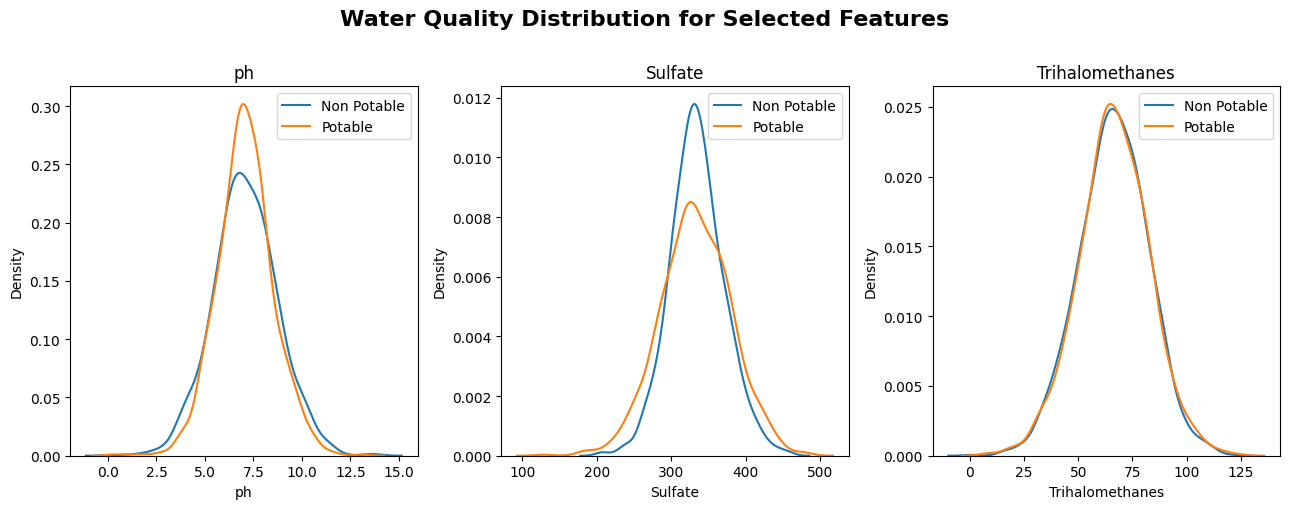

In [82]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] == 1]

selected_features = ['ph', 'Sulfate', 'Trihalomethanes']

plt.figure(figsize=(13, 5))

for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i + 1)
    plt.title(feature)
    sns.kdeplot(x=non_potable[feature], label="Non Potable")
    sns.kdeplot(x=potable[feature], label="Potable")
    plt.legend()

plt.suptitle('Water Quality Distribution for Selected Features', y=1.01, size=16, color='black', weight='bold')
plt.tight_layout()
plt.show()


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [10]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

In [11]:
df1 = df.copy()
df1['ph'].fillna(value=df1['ph'].mean(),inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(),inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(),inplace=True)

In [12]:
df1.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Dealing with outliers

Text(0.5, 1.01, 'Box plot before outlier removal')

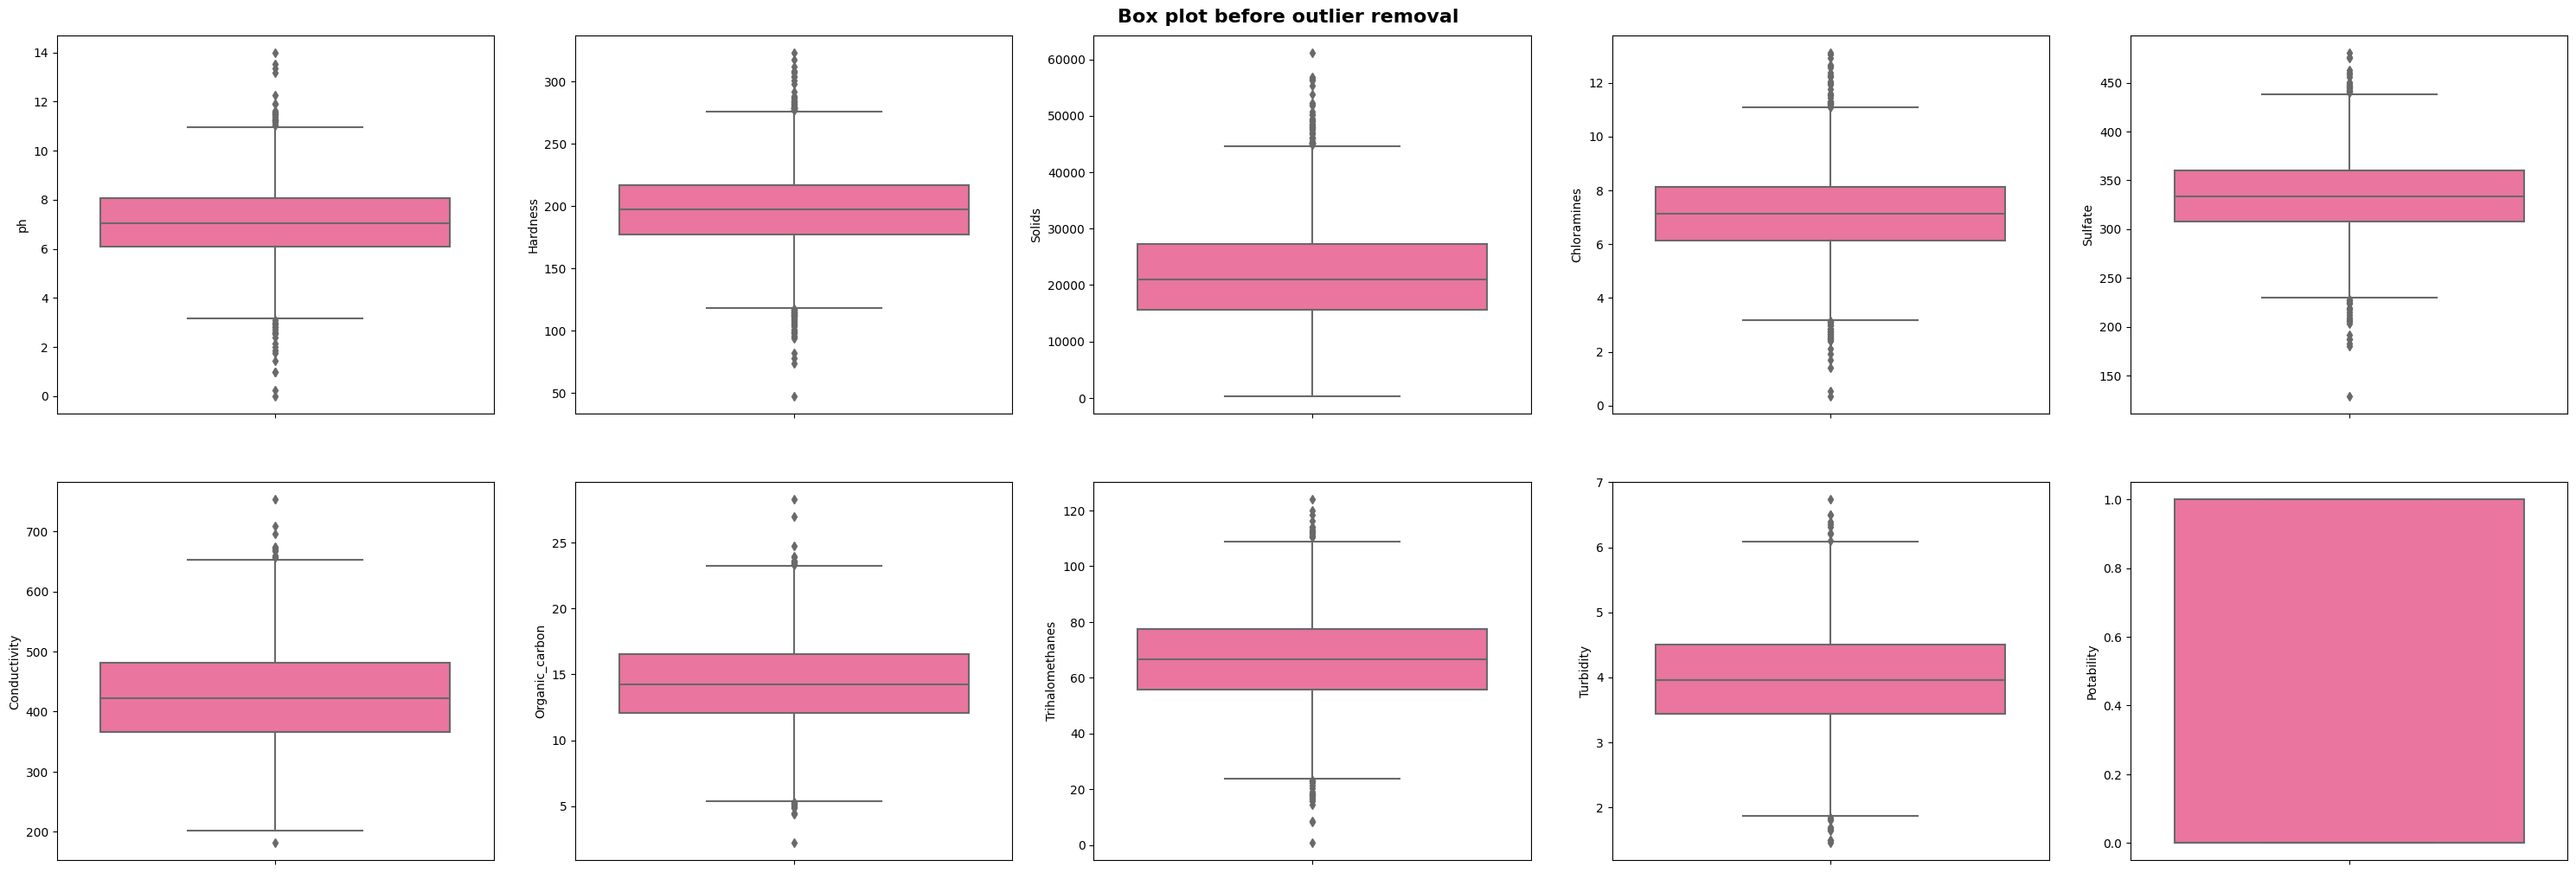

In [13]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for feat, value in df.items():
    sns.boxplot(y=feat, data=df, ax=ax[index], color='#FE6198')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle('Box plot before outlier removal',y=1.01, size = 16, color = 'black', weight='bold')

Since we can see we have outliers for all the features , we will deal with them suing the 3-sigma rule which states data points beyond a certain number of standard deviations from the mean are considered outliers.

In [14]:
from scipy import stats

'''calculates z-scores for each data point and creates a boolean mask
indicating whether each data point is an outlier based on the specified threshold.
The outliers are then removed from the DataFrame.'''

z_scores = stats.zscore(df1)
threshold = 3

df_no_out = df1.copy()
df_no_out = df_no_out[(np.abs(z_scores) <= threshold).all(axis=1)]
df_no_out.shape


(3128, 10)

Text(0.5, 1.01, 'Box plot after outlier removal')

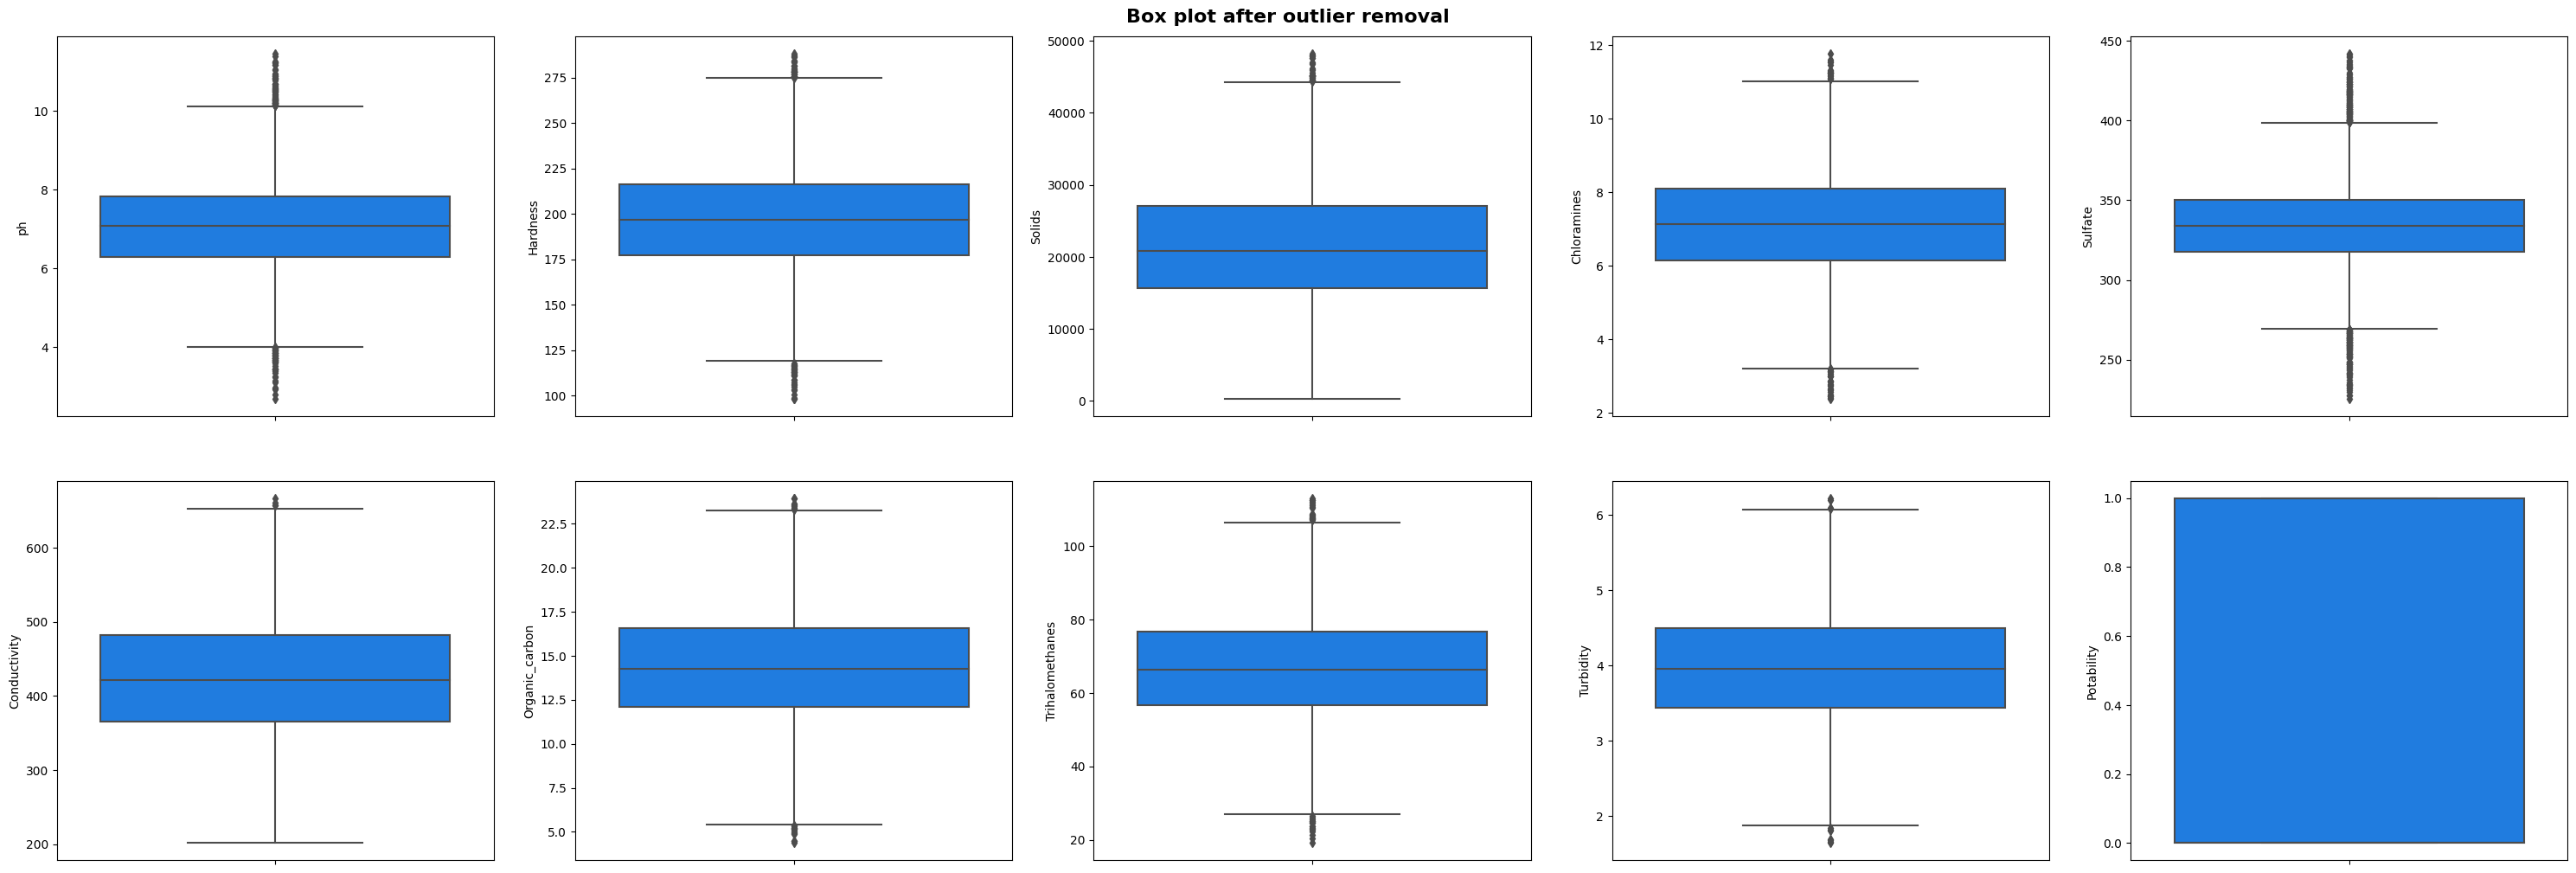

In [15]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for feat, value in df_no_out.items():
    sns.boxplot(y=feat, data=df_no_out, ax=ax[index], color='#007bff')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle('Box plot after outlier removal',y=1.01, size = 16, color = 'black', weight='bold')

Dealing with Class imbalance

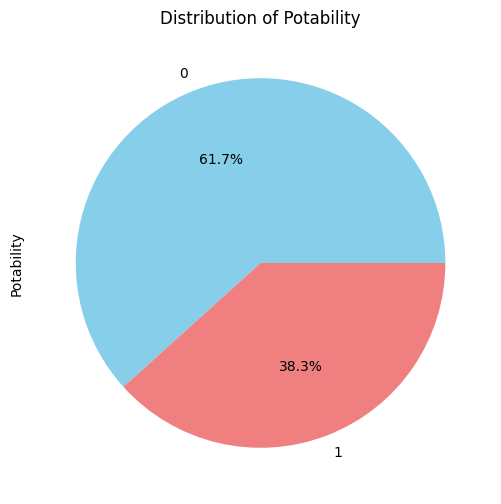

In [85]:
plt.figure(figsize=(6, 6))

# Plotting the pie chart with percentages
df_no_out['Potability'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Adding a title
plt.title('Distribution of Potability')

# Display the plot
plt.show()

In [16]:
df_no_out['Potability'].value_counts()

0    1930
1    1198
Name: Potability, dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd


X = df_no_out.drop('Potability', axis=1)
y = df_no_out['Potability']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Potability')], axis=1)


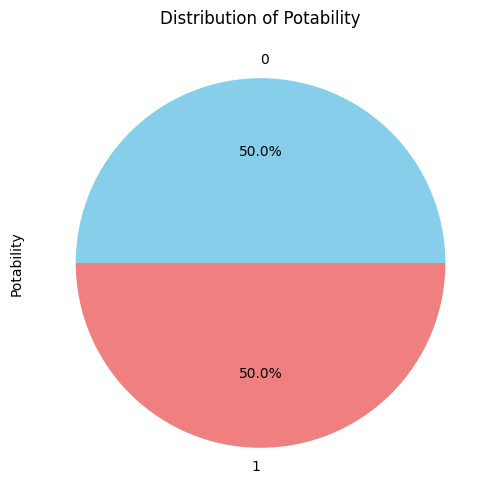

In [86]:
plt.figure(figsize=(6, 6))

# Plotting the pie chart with percentages
df_resampled['Potability'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Adding a title
plt.title('Distribution of Potability')

# Display the plot
plt.show()

In [18]:
df_resampled['Potability'].value_counts()

0    1930
1    1930
Name: Potability, dtype: int64

In [19]:
df_resampled.to_csv('df_resampled_preprocessed.csv', index=False)

Model Building

In [20]:
X = df_resampled.drop('Potability',axis=1)
y = df_resampled['Potability']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


Logistic Regression

In [23]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)

In [24]:
print("The accuracy for Logistic Regression is", accuracy_score(y_test, LogReg_pred))
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 0.4896373056994819
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       385
           1       0.49      0.48      0.49       387

    accuracy                           0.49       772
   macro avg       0.49      0.49      0.49       772
weighted avg       0.49      0.49      0.49       772



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

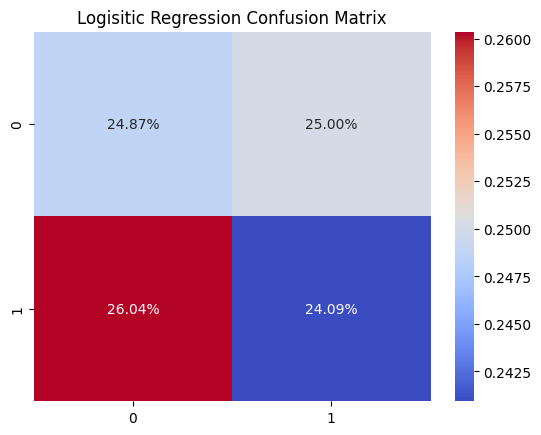

In [25]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("Logisitic Regression Confusion Matrix")

KNN

In [26]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

In [27]:
print("The classification report using KNeighbors is:", accuracy_score(y_test, KNN_pred))
print(classification_report(y_test, KNN_pred))

The classification report using KNeighbors is: 0.633419689119171
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       385
           1       0.62      0.68      0.65       387

    accuracy                           0.63       772
   macro avg       0.63      0.63      0.63       772
weighted avg       0.63      0.63      0.63       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

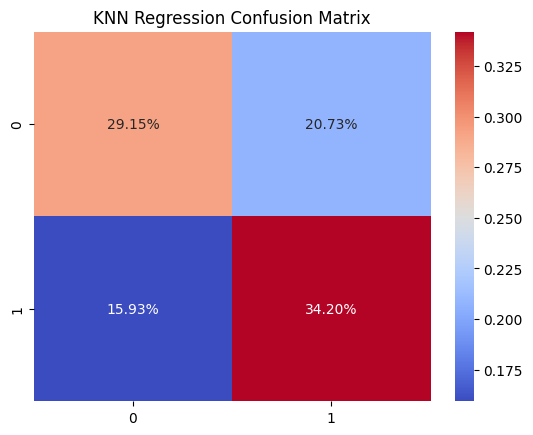

In [28]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("KNN Regression Confusion Matrix")

Decision Tree Classifier

In [29]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)

In [30]:
print("The accuracy for Decision Tree is", accuracy_score(y_test, DecTree_pred))
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is 0.7046632124352331
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       385
           1       0.68      0.79      0.73       387

    accuracy                           0.70       772
   macro avg       0.71      0.70      0.70       772
weighted avg       0.71      0.70      0.70       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

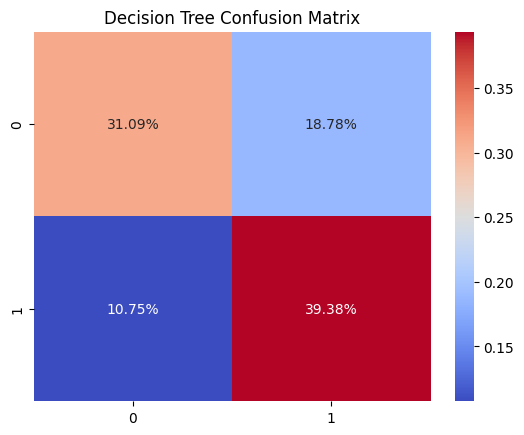

In [31]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm/np.sum(DecTree_cm), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("Decision Tree Confusion Matrix")

Random Forest

In [32]:
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)

In [33]:
print("The accuracy for Random Forest is", accuracy_score(y_test, RFTree_pred))
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))

The accuracy for Random Forest is 0.7707253886010362
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       385
           1       0.77      0.77      0.77       387

    accuracy                           0.77       772
   macro avg       0.77      0.77      0.77       772
weighted avg       0.77      0.77      0.77       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

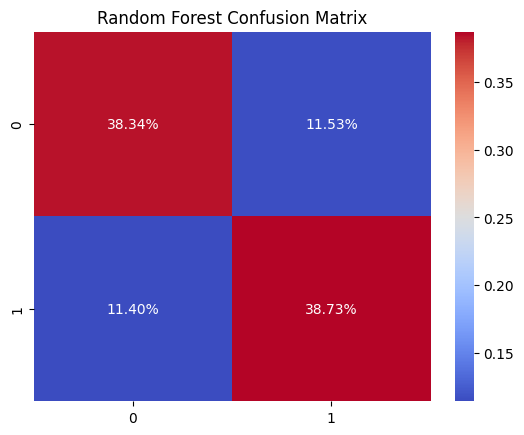

In [34]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm/np.sum(RFTree_cm), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("Random Forest Confusion Matrix")

Support Vector Classifier

In [35]:
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

In [36]:
print("The accuracy for SVM is",accuracy_score(y_test, SVM_pred) )
print("The classification report using SVM is:")
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.6541450777202072
The classification report using SVM is:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       385
           1       0.65      0.66      0.66       387

    accuracy                           0.65       772
   macro avg       0.65      0.65      0.65       772
weighted avg       0.65      0.65      0.65       772



Text(0.5, 1.0, 'SVM Confusion Matrix')

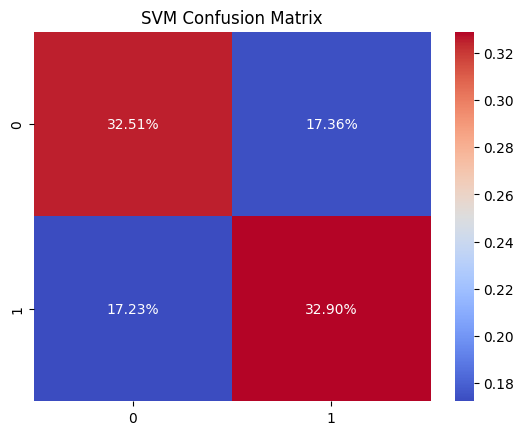

In [37]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("SVM Confusion Matrix")

XG Boost Classifier

In [38]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)

In [39]:
print("The accuracy for XGBoost is", accuracy_score(y_test, XGB_pred ))
print("The classification report using XGBoost is:")
print(classification_report(y_test, XGB_pred))

The accuracy for XGBoost is 0.7487046632124352
The classification report using XGBoost is:
              precision    recall  f1-score   support

           0       0.78      0.70      0.73       385
           1       0.73      0.80      0.76       387

    accuracy                           0.75       772
   macro avg       0.75      0.75      0.75       772
weighted avg       0.75      0.75      0.75       772



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

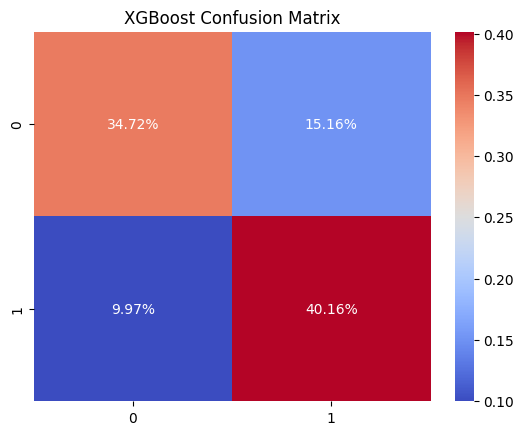

In [40]:
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm/np.sum(XGB_cm), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("XGBoost Confusion Matrix")

Model Comparision

In [41]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [42]:
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)


In [43]:
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_precision = precision_score(y_test, KNN_pred)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)

In [44]:
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred)
DecTree_recall = recall_score(y_test, DecTree_pred)
DecTree_f1 = f1_score(y_test, DecTree_pred)

In [45]:
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred)
RFTree_recall = recall_score(y_test, RFTree_pred)
RFTree_f1 = f1_score(y_test, RFTree_pred)

In [46]:
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)
SVM_f1 = f1_score(y_test, SVM_pred)

In [47]:
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)

In [48]:
classifiers = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
    'Precision' :[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision, XGB_precision],
    'Recall' :[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall, XGB_recall],
    'F1 Score' :[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1, XGB_f1]
})
classifiers= classifiers.sort_values(by='Accuracy', ascending=False)

In [49]:
classifiers

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.770725,0.770619,0.772610,0.771613
5,XGBoost,0.748705,0.725995,0.801034,0.761671
2,Decision Tree,0.704663,0.677060,0.785530,0.727273
4,Support Vector,0.654145,0.654639,0.656331,0.655484
1,KNN Regression,0.633420,0.622642,0.682171,0.651048
0,Logistic Regression,0.489637,0.490765,0.480620,0.485640


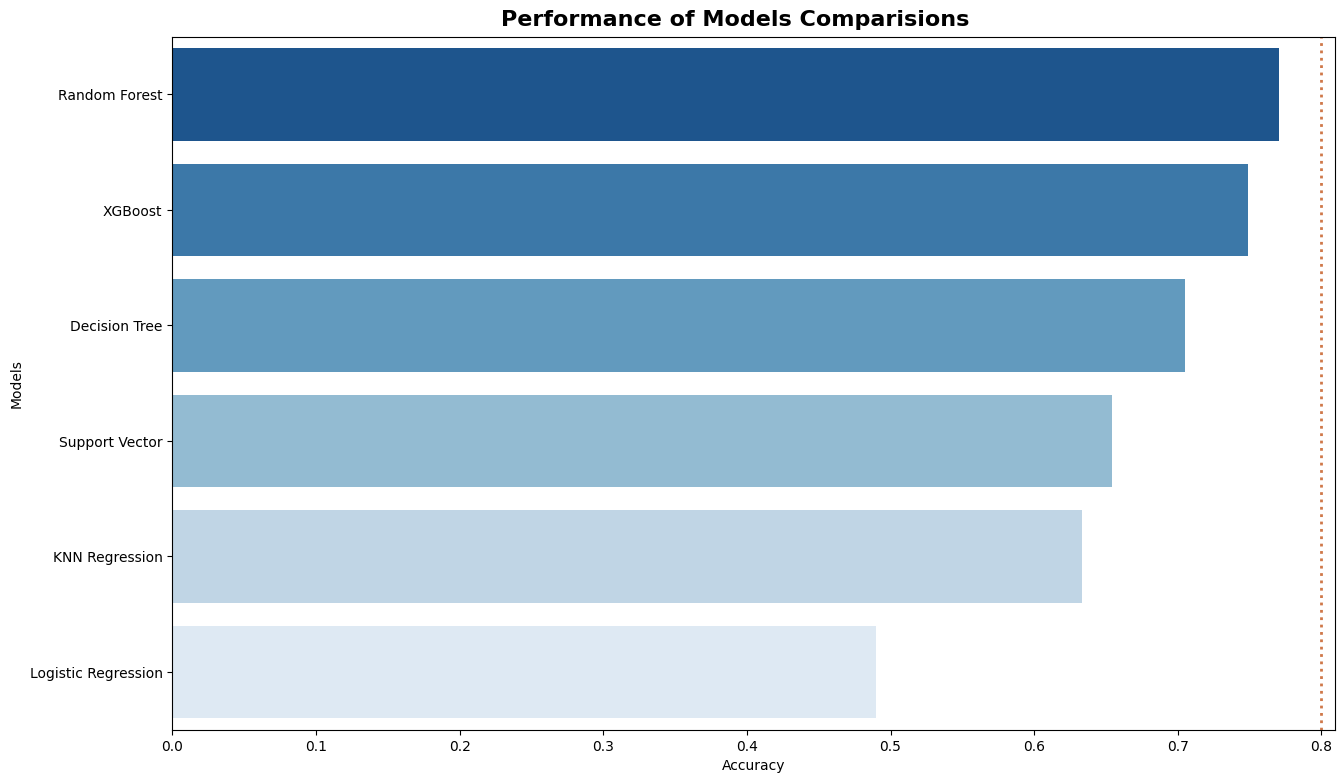

In [50]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=classifiers,y='Model', x='Accuracy',palette = 'Blues_r')
ax.figure.suptitle('Performance of Models Comparisions',y=0.91, size = 16, color = 'black', weight='bold');
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,linewidth = 2, linestyle =":",color ='#cf7849');

With general model implementation without parameter tuning , we can see that the Random Forest classifier performs best among all other classifiers. Here the worst model is Logistic regression whose accuracy score is less than 50%.

Hyper parameter tuning. (implementation is based on https://scikit-learn.org/stable/modules/grid_search.html )

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

In [53]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
para_lgr = {'solver': ['lbfgs','liblinear'], 'penalty': ['l2', 'l1','none']}
grid_lgr = GridSearchCV(lgr, param_grid=para_lgr, cv=5)
grid_lgr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lgr.best_params_)

Best parameters for Logistic Regression: {'penalty': 'l1', 'solver': 'liblinear'}


In [54]:
LogReg2 = LogisticRegression(penalty = 'l1', solver= 'liblinear')
LogReg2.fit(X_train, y_train)
LogReg2_pred = LogReg2.predict(X_test)
LogReg2_acc = accuracy_score(y_test, LogReg2_pred)

In [93]:
LogReg2_acc

0.4896373056994819

Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

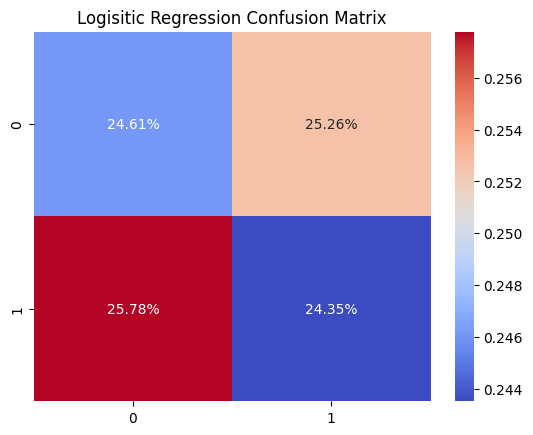

In [94]:
LogReg_cm2 = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg_cm2/np.sum(LogReg_cm2), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("Logisitic Regression Confusion Matrix")

In [56]:
para_knn = {'n_neighbors':np.arange(1, 50), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 38, 'weights': 'distance'}


In [57]:
KNN2 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 38, weights ='distance')
KNN2.fit(X_train, y_train)
KNN2_pred = KNN2.predict(X_test)
KNN2_acc = accuracy_score(y_test, KNN2_pred)

In [58]:
KNN2_acc

0.7474093264248705

Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

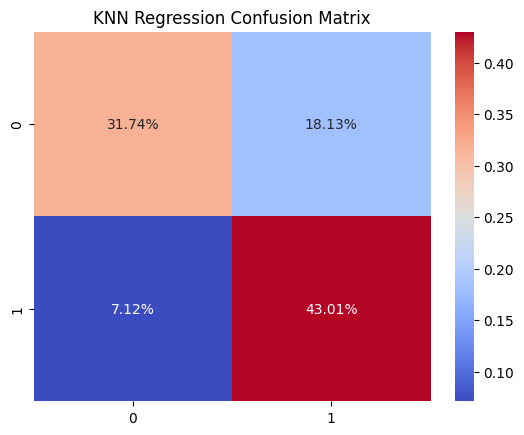

In [88]:
KNN_cm2 = confusion_matrix(y_test, KNN2_pred)
sns.heatmap(KNN_cm2/np.sum(KNN_cm2), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("KNN Regression Confusion Matrix")

In [59]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 1}


In [60]:
DecTree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 36, min_samples_leaf = 1)
DecTree2.fit(X_train, y_train)
DecTree2_pred = DecTree2.predict(X_test)
DecTree2_acc = accuracy_score(y_test, DecTree2_pred)

In [61]:
DecTree2_acc

0.6994818652849741

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

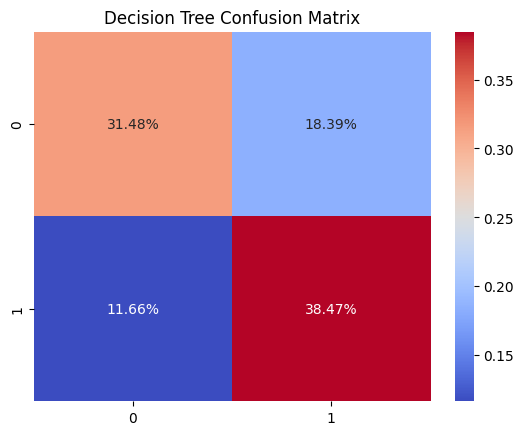

In [89]:
DecTree_cm2 = confusion_matrix(y_test, DecTree2_pred)
sns.heatmap(DecTree_cm2/np.sum(DecTree_cm2), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("Decision Tree Confusion Matrix")

In [62]:
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}


In [63]:
RFTree2 = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 350)
RFTree2.fit(X_train, y_train)
RFTree2_pred = RFTree2.predict(X_test)
RFTree2_acc = accuracy_score(y_test, RFTree2_pred)

In [64]:
RFTree2_acc

0.7603626943005182

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

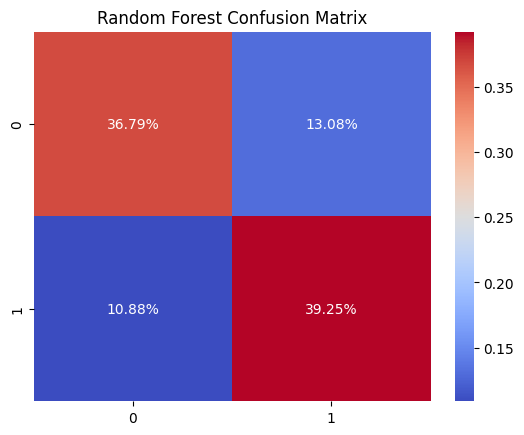

In [90]:
RFTree_cm2 = confusion_matrix(y_test, RFTree2_pred)
sns.heatmap(RFTree_cm2/np.sum(RFTree_cm2), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("Random Forest Confusion Matrix")

In [65]:
para_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(svc, param_grid=para_svc, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters for SVM:", grid_svc.best_params_)

Best parameters for SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [66]:
SVM2 = SVC(C = 1, gamma = 1, kernel = 'rbf')
SVM2.fit(X_train, y_train)
SVM2_pred = SVM2.predict(X_test)
SVM2_acc = accuracy_score(y_test, SVM2_pred)

In [67]:
SVM2_acc

0.7629533678756477

Text(0.5, 1.0, 'SVM Confusion Matrix')

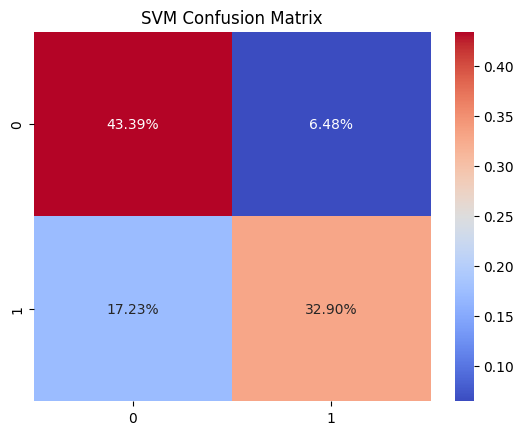

In [91]:
SVM_cm2 = confusion_matrix(y_test, SVM2_pred)
sns.heatmap(SVM_cm2/np.sum(SVM_cm2), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("SVM Confusion Matrix")

In [68]:
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for XGBoost: {'n_estimators': 800, 'learning_rate': 0.2}


In [69]:
XGB2 = XGBClassifier(n_estimators = 600, learning_rate = 0.2)
XGB2.fit(X_train, y_train)
XGB2_pred = XGB2.predict(X_test)
XGB2_acc = accuracy_score(y_test, XGB2_pred)

In [70]:
XGB2_acc

0.75

Text(0.5, 1.0, 'XGBoost Confusion Matrix')

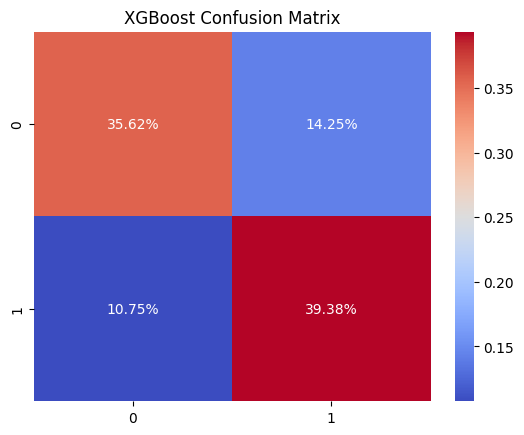

In [92]:
XGB_cm2 = confusion_matrix(y_test, XGB2_pred)
sns.heatmap(XGB_cm2/np.sum(XGB_cm2), annot = True, fmt = '0.2%', cmap = 'coolwarm')
plt.title("XGBoost Confusion Matrix")

In [71]:
models2 = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc]
})
models2 = models2.sort_values(by='Accuracy', ascending=False)

In [72]:
models2

,Model,Accuracy
4,Support Vector,0.762953
3,Random Forest,0.760363
5,XGBoost,0.750000
1,KNN Regression,0.747409
2,Decision Tree,0.699482
0,Logistic Regression,0.489637


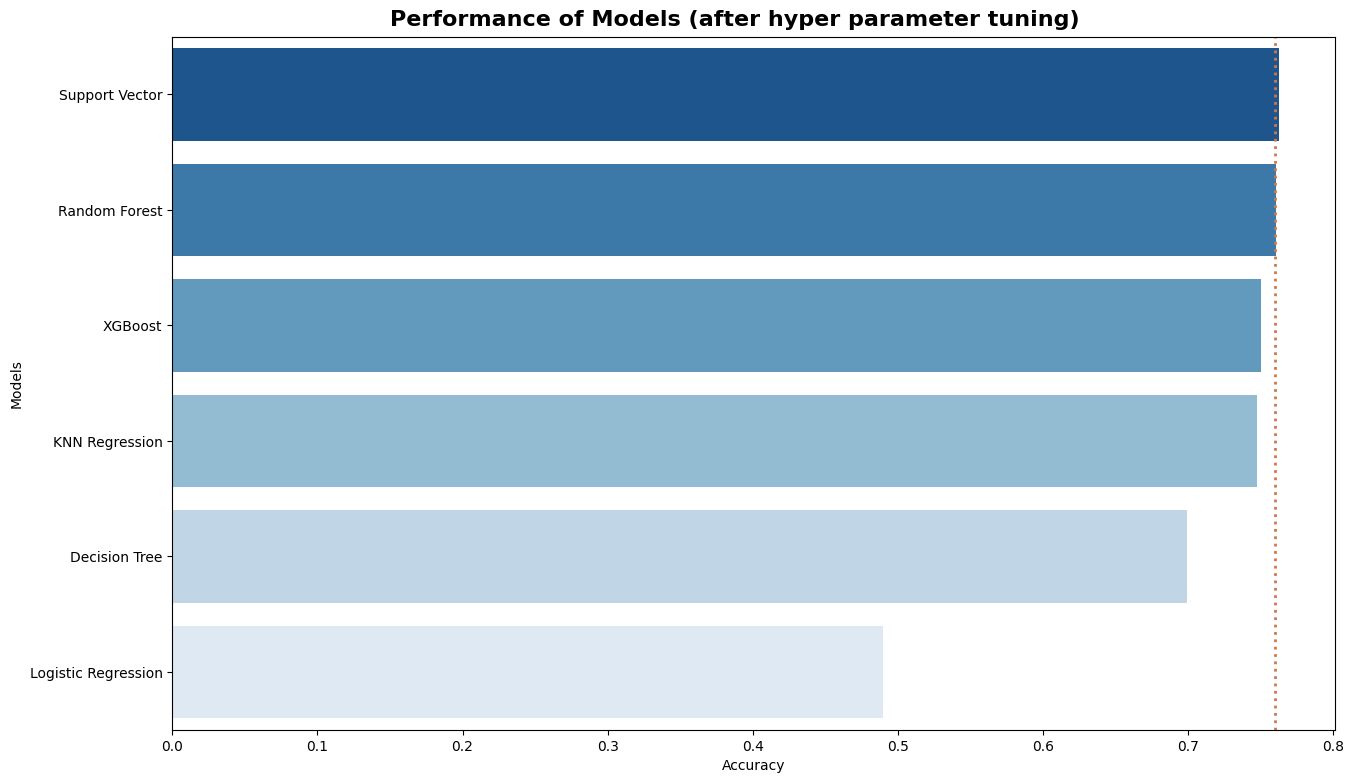

In [73]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models2,
                 y='Model',
                 x='Accuracy',
                 palette = 'Blues_r')

ax.figure.suptitle('Performance of Models (after hyper parameter tuning)',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.76, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');

After hyper parameter tuning we can see that its still Random forest which is performing better than other models. Indeed the accuracy score of Support Vector Classifier has big jump from 65.4% to 76.3%. For our model evaluation we are selecting the top 2 models  from the 6 classifier that we selected.

Model Evaluation and performance

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

In [75]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

RFTree2_scores = cross_val_score(RFTree2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
SVM2_scores = cross_val_score(SVM2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
XGB2_scores = cross_val_score(XGB2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy of CV - Random Forest: %.4f (%.4f)' % (mean(RFTree2_scores), stdev(RFTree2_scores)))
print('Accuracy of CV - SVM: %.4f (%.4f)' % (mean(SVM2_scores), stdev(SVM2_scores)))
print('Accuracy of CV - XGBoost: %.4f (%.4f)' % (mean(XGB2_scores), stdev(XGB2_scores)))

Accuracy of CV - Random Forest: 0.7930 (0.0272)
Accuracy of CV - SVM: 0.8088 (0.0199)
Accuracy of CV - XGBoost: 0.7679 (0.0250)


From the cross validation using the KFold strategy with 10 folds for three different classifiers: Random Forest (RFTree2), Support Vector Machine (SVM2), and XGBoost (XGB2), we have highest mean accuracy for the SVM classifier so according to our analysis SVM or support vector classifier is the preferred model for our analysis.

In [76]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, SVM2_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7632


In [77]:
Cross_validated_ROC_AUC = cross_val_score(SVM2, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8048


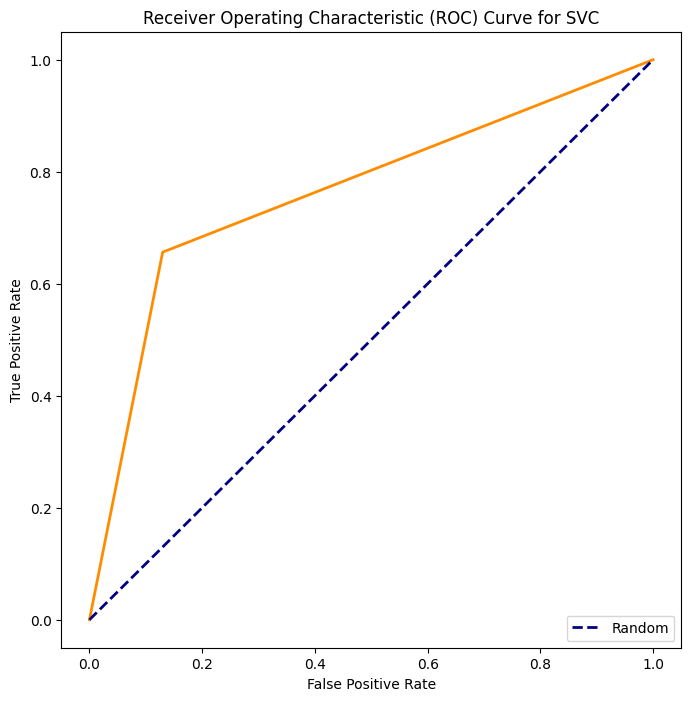

In [78]:
from sklearn.metrics import roc_curve

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, SVM2_pred)


# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend(loc='lower right')
plt.show()